In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
df.describe()

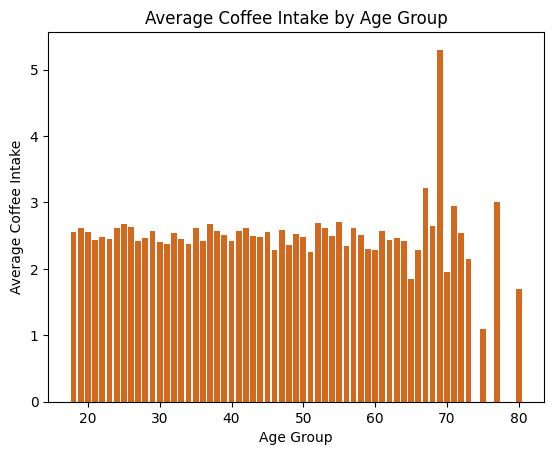

In [4]:
avg_coffee_intakes_by_age_group = df.groupby("Age")["Coffee_Intake"].mean()
plt.bar(avg_coffee_intakes_by_age_group.index, avg_coffee_intakes_by_age_group.values, color="chocolate")
plt.title("Average Coffee Intake by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Coffee Intake")
plt.show()

dari chart diatas menunjukkan umur 68-70 adalah orang yang banyak mengkonsumsi kopi

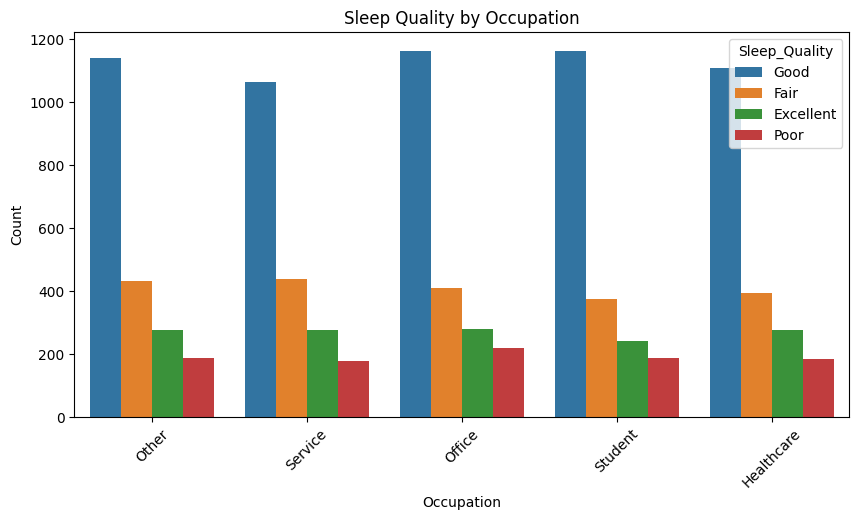

In [5]:
crosstab = pd.crosstab(df["Occupation"], df["Sleep_Quality"])

plt.figure(figsize=(10,5))
sns.countplot(x="Occupation", hue="Sleep_Quality", data=df)
plt.title("Sleep Quality by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

dari data diatas, semua memiliki kualitas tidur yang baik

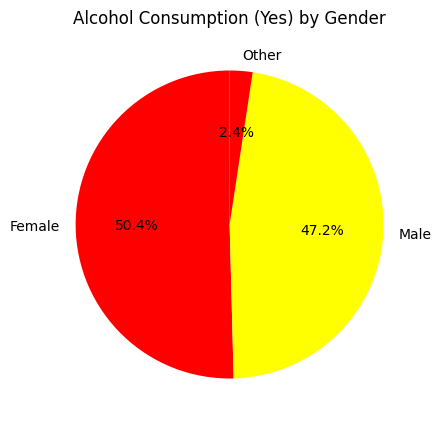

In [7]:
counts = df[df["Alcohol_Consumption"] == 1]["Gender"].value_counts()


plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=["red","yellow"])
plt.title("Alcohol Consumption (Yes) by Gender")
plt.show()

dari pie chart hari ini, perempuan lebih sedikit mengkonsumsi alcohol dibanding laki laki

In [8]:
# Encoding for ordinal column
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {
 'Australia': 1,
 'Belgium': 2,
 'Brazil': 3,
 'Canada': 4,
 'China': 5,
 'Finland': 6,
 'France': 7,
 'Germany': 8,
 'India': 9,
 'Italy': 10,
 'Japan': 11,
 'Mexico': 12,
 'Netherlands': 13,
 'Norway': 14,
 'South Korea': 15,
 'Spain': 16,
 'Sweden': 17,
 'Switzerland': 18,
 'UK': 19,
 'USA': 20
}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {
 'Healthcare': 1,
 'Office': 2,
 'Other': 3,
 'Service': 4,
 'Student': 5
}
df['Health_Issues'] = df['Health_Issues'].fillna('Unkown')
health_issues_map = {
 'Mild': 1,
 'Moderate': 2,
 'Unkown': 3,
 'Severe': 4
}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}


df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)

In [9]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [10]:
X.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,8,3.5,328.1,7.5,3,24.9,78,1,14.5,3,0,0
1,2,33,1,8,1.0,94.1,6.2,3,20.0,67,1,11.0,4,0,0
2,3,42,1,3,5.3,503.7,5.9,2,22.7,59,2,11.2,2,0,0
3,4,53,1,8,2.6,249.2,7.3,3,24.7,71,1,6.6,3,0,0
4,5,32,2,16,3.1,298.0,5.3,2,24.1,76,2,8.5,5,0,1


In [11]:
y.head()

,Health_Issues
0,3
1,3
2,1
3,1
4,1


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [15]:
y_pred_gini = clf_gini.predict(X_test)

In [16]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


[Text(0.5, 0.9, 'x[7] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.7, 'x[1] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[8] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[8] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [6, 8, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[8] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[1] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[8] <= 29.95

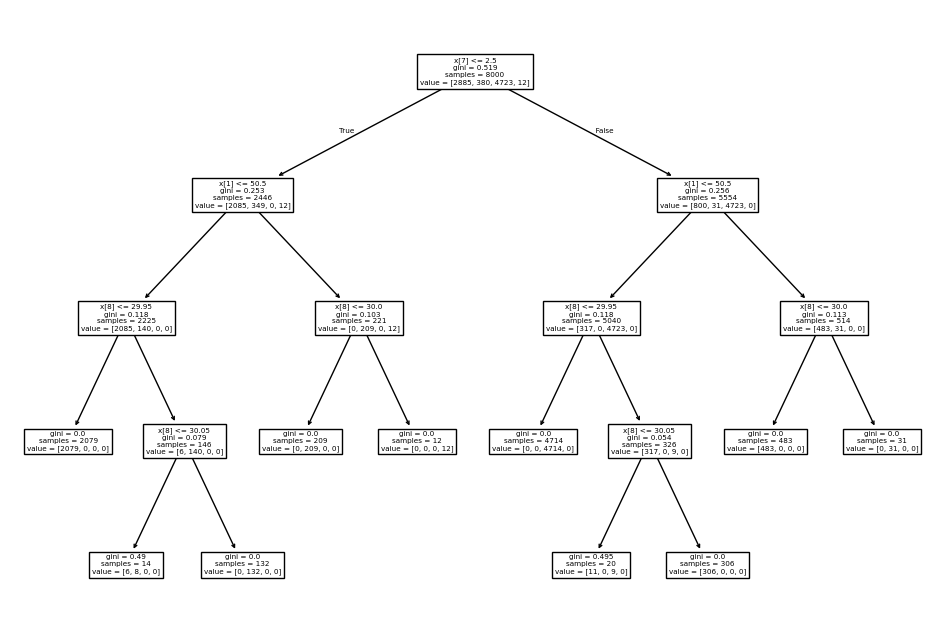

In [17]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [18]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [19]:
y_pred_en = clf_en.predict(X_test)

In [20]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[7] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.625, 'x[1] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.375, 0.375, 'x[8] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[1] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [317, 0, 4723, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

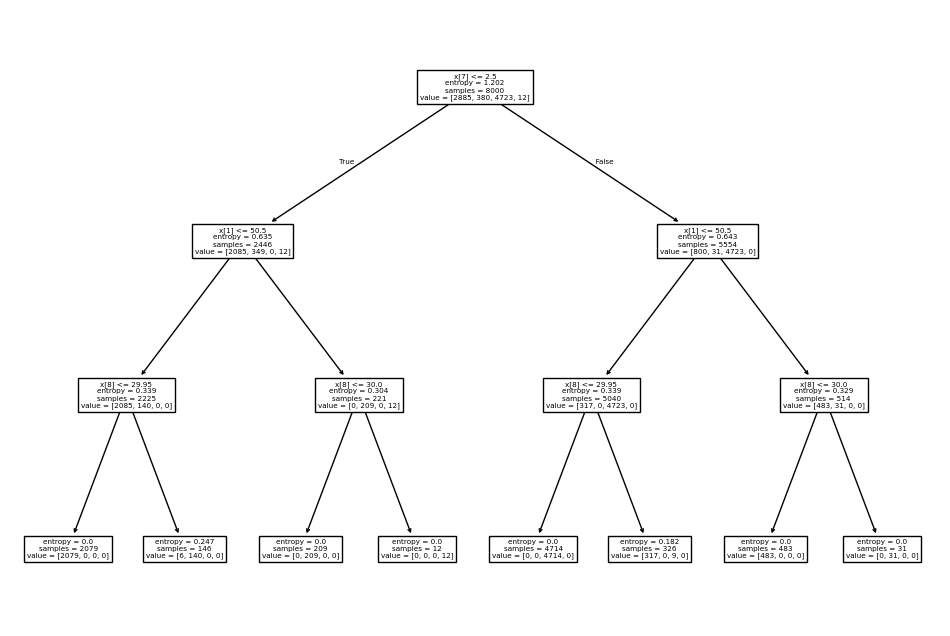

In [21]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [22]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred_nb = nb_classifier.predict(X_test)

In [24]:
print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8580


In [25]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00      1218
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Gini mendapat 0,9965 sedangkan naive bayes mendapat 0,85

In [26]:
# Pastikan saat training ID sudah di-drop
X = df.drop(columns=['ID','Health_Issues'])
y = df['Health_Issues']

# Split + training Decision Tree Gini
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# --- New data encoded sesuai mapping
row = {
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Occupation': occupation_map['Student'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,
    'Smoking': 1,
    'Alcohol_Consumption': 1
}

# Buat dataframe sesuai kolom training (X.columns)
input_df = pd.DataFrame([row], columns=X.columns)

# Prediksi
prediction_gini = clf_gini.predict(input_df)

inv_health_map = {0:'None', 1:'Mild', 2:'Moderate', 3:'Severe'}
print("Prediksi Health Issues:", inv_health_map[prediction_gini[0]])

Prediksi Health Issues: Mild
